# Gray-Scott Reaction-Diffusion Model

This notebook will run the Gray-Scott Reaction-Diffusion model to answer questions posed in the assignment and showcase model usage.

### 1. Imports

To run the code we import the neccesary class and functions

In [1]:
from gs_class import GrayScott
from gs_visual import create_animation, plot_field_UV, plot_field, plot_field_compare
from gs_stability import detect_pattern_variance, detect_pattern_mean
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

### 2 Class Structure (explanation)
The Class imidiately initializes a Gray-Scott reaction diffusion grid for U and V with initial conditions as described below. The class implements Neumann Boundary conditions. Below are the initial conditions as described in the assignment:

In [ ]:
n: int = 100,
center: int = 6,
i_value_U: float = 0.5,
i_value_V: float = 0.25,
dx: float = 1.0,
dt: float = 1.0,
dU: float = 0.16,
dV: float = 0.08,
feed: float = 0.035,
kill: float = 0.06, 
noise: float = 0.0

To create a class simply do the following:

In [ ]:
# With initial conditions as described above
gray_scott = GrayScott()

# With some different initial conditions 
# These are not recommended for further usage
n = 5
center = 1
i_value_U = 0.6
i_value_V = 0.35

gray_scott2 = GrayScott(n, center, i_value_U, i_value_V)

The classes hold the grids for U and V as self.U and self.V as np.array.

In [ ]:
print(gray_scott2.U)
print(gray_scott2.V)

The Class can be updated simply by calling on the update function. Which will automatically store the new grids for U and V in seld.U and self.V respecitively.

In [ ]:
gray_scott.update()

### 3. Visualisation
The Gray Scott model can be visualised by plots of the field at a given iteration or an animation.

#### 3.1 Heatmaps for U and V (no noise)

First we plot field heatmaps for 'U' and 'V' seperately at a given iteration (time).

Then we will plot the fields at a given iteration (time), this will give both plots with a heatmap that is generated for the min and max of both U and V fields to accurately compare them.

Iterations are set at 10000 for all, but can be adjusted by passing the parameter.

In [ ]:
# Create a heatmap for the U field
gs_U_field = GrayScott()
fig = plot_field(gs_U_field, field='U')
plt.savefig('results/gs_field_U.png', dpi=300)

In [ ]:
# Create a heatmap for the V field
gs_V_field = GrayScott()
fig = plot_field(gs_V_field, field='V')
plt.savefig('results/gs_field_V.png', dpi=300)

In [ ]:
# Compare fields of U and V
gray_scott_UV = GrayScott()
fig = plot_field_UV(gray_scott_UV)
plt.savefig('results/gs_fields_UV.png', dpi=300)

#### 3.2 Animation of field of U (no noise)

Lastly, we will create a Gray Scott class object, with the standard initial parameters (without noise) and then pass it to the animation function. To view the animation go to results/gray_scott_animation.png.

NOTE: this may take several minutes, lower 'frames' for decreased render time


In [ ]:
gs = GrayScott()
ani = create_animation(gs, frames=400, updates_per_frame=100)
ani.save('results/gs_U_no_noise.gif', writer='pillow')

# Display animation as HTML5 video
display(HTML(ani.to_jshtml(fps=30, default_mode='loop')))


#### 3.3 Field of U and V (with noise)

We now plot the fields for U and V with noise, note how the pattern may not be symmetric.

In [ ]:
gray_scott_UV_noise = GrayScott(noise=0.001)
fig = plot_field_UV(gray_scott_UV_noise)
plt.savefig('results/gs_field_UV_noise.png', dpi=300)

#### 3.4 Animation of field of U (with noise)

Note that if the seed is disabled, the noise, due to its stochasticity, may result in an monotone field.

In [ ]:
# Uncomment seed to generate animation with noise
np.random.seed(42)

# Create an animation from a GrayScott class
gs_noise = GrayScott(noise=0.01)
ani = create_animation(gs_noise, frames=200, updates_per_frame=30)
ani.save('results/gs_field_U_noise.gif', writer='pillow')

# Display animation as HTML5 video
display(HTML(ani.to_jshtml(fps=20, default_mode='loop')))


### 4. Different initial parameters

We can pass different initial values to the Gray Scott class to view the effects of changing these parameters on the formation of patterns, especially the Feed and Kill rate have significant effects on emerging patterns. We may also see that some emerging patterns are time-dependent while others are not.

Below is a list of initial parameter settings that would render the specified type of pattern. Due to file sizes, we will not render all of them as animation automatically. To view them as animation, adjust the code below and simply copy-paste the parameters within the GrayScott class object.

1. rings
    - n=200, feed=0.042, kill=0.059
2. mitosis (cell divison) 
    - spots:              n=200, feed=0.02, kill=0.057
    - stripes from spots: n=200, feed=0.03, kill=0.057
3. Stripes and spots
    - n=200, feed=0.033, kill=0.06, noise=0.001
4. negative spots
    - n=200, feed=0.036, kill=0.057
5. large spirals (Belousov-Zhabotinsky reaction  in petri)
    - Needs larger center and noise
    - n=200, center=12, feed=0.011, kill=0.041, noise=0.01
6. Waves
    - n=200, feed=0.018, kill=0.050, noise=0.001
7. Wave-like signals with flashes (best with noise)
    - n=200, feed=0.014, kill=0.039, noise=0.001
8. Maze-like pattern
    - n=200, feed=0.03, kill=0.057, noise=0.001


In [ ]:
np.random.seed(42)
gs = GrayScott(n=200, center=12, feed=0.011, kill=0.041, noise=0.01)
ani = create_animation(gs, frames=150, updates_per_frame=50)
# ani.save('results/gs_U_no_noise.gif', writer='pillow')

# Display animation as HTML5 video
display(HTML(ani.to_jshtml(fps=20, default_mode='loop')))

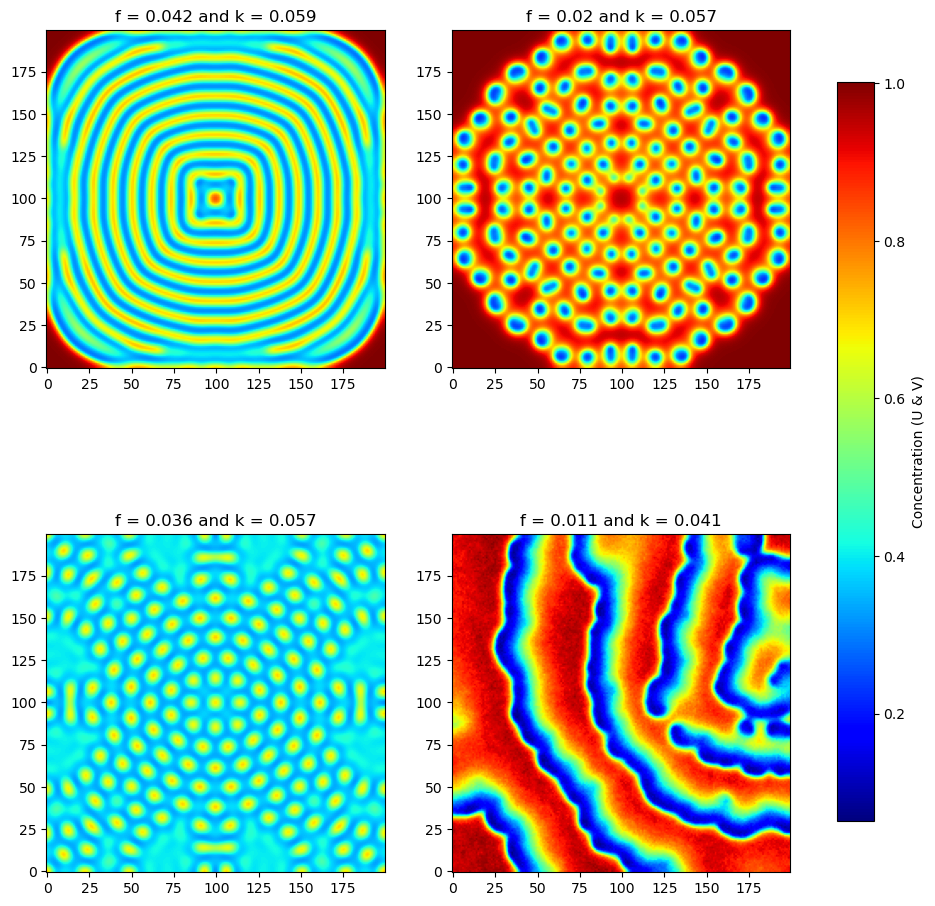

In [2]:
np.random.seed(42)
gs1 = GrayScott(n=200, feed=0.042, kill=0.059)  # Rings
gs2 = GrayScott(n=200, feed=0.02, kill=0.057)   # Mitosis
gs3 = GrayScott(n=200, feed=0.036, kill=0.057)  # Negative spots
gs4 = GrayScott(n=200, center=12, feed=0.011, kill=0.041, noise=0.01) #Petri dish-like patterns

plot_field_compare(gs1, gs2, gs3, gs4, iterations=5000)